In [ ]:
import sys
!{sys.executable} -m pip install ultralytics

In [1]:
import ultralytics

In [ ]:
!yolo detect predict model=yolo_model1/yolo_model1.pt source='dataset/1b0f92f5-101.png' save=True save_txt=True save_conf=True

In [11]:
img_file_name = 'dataset/1b0f92f5-101.png'

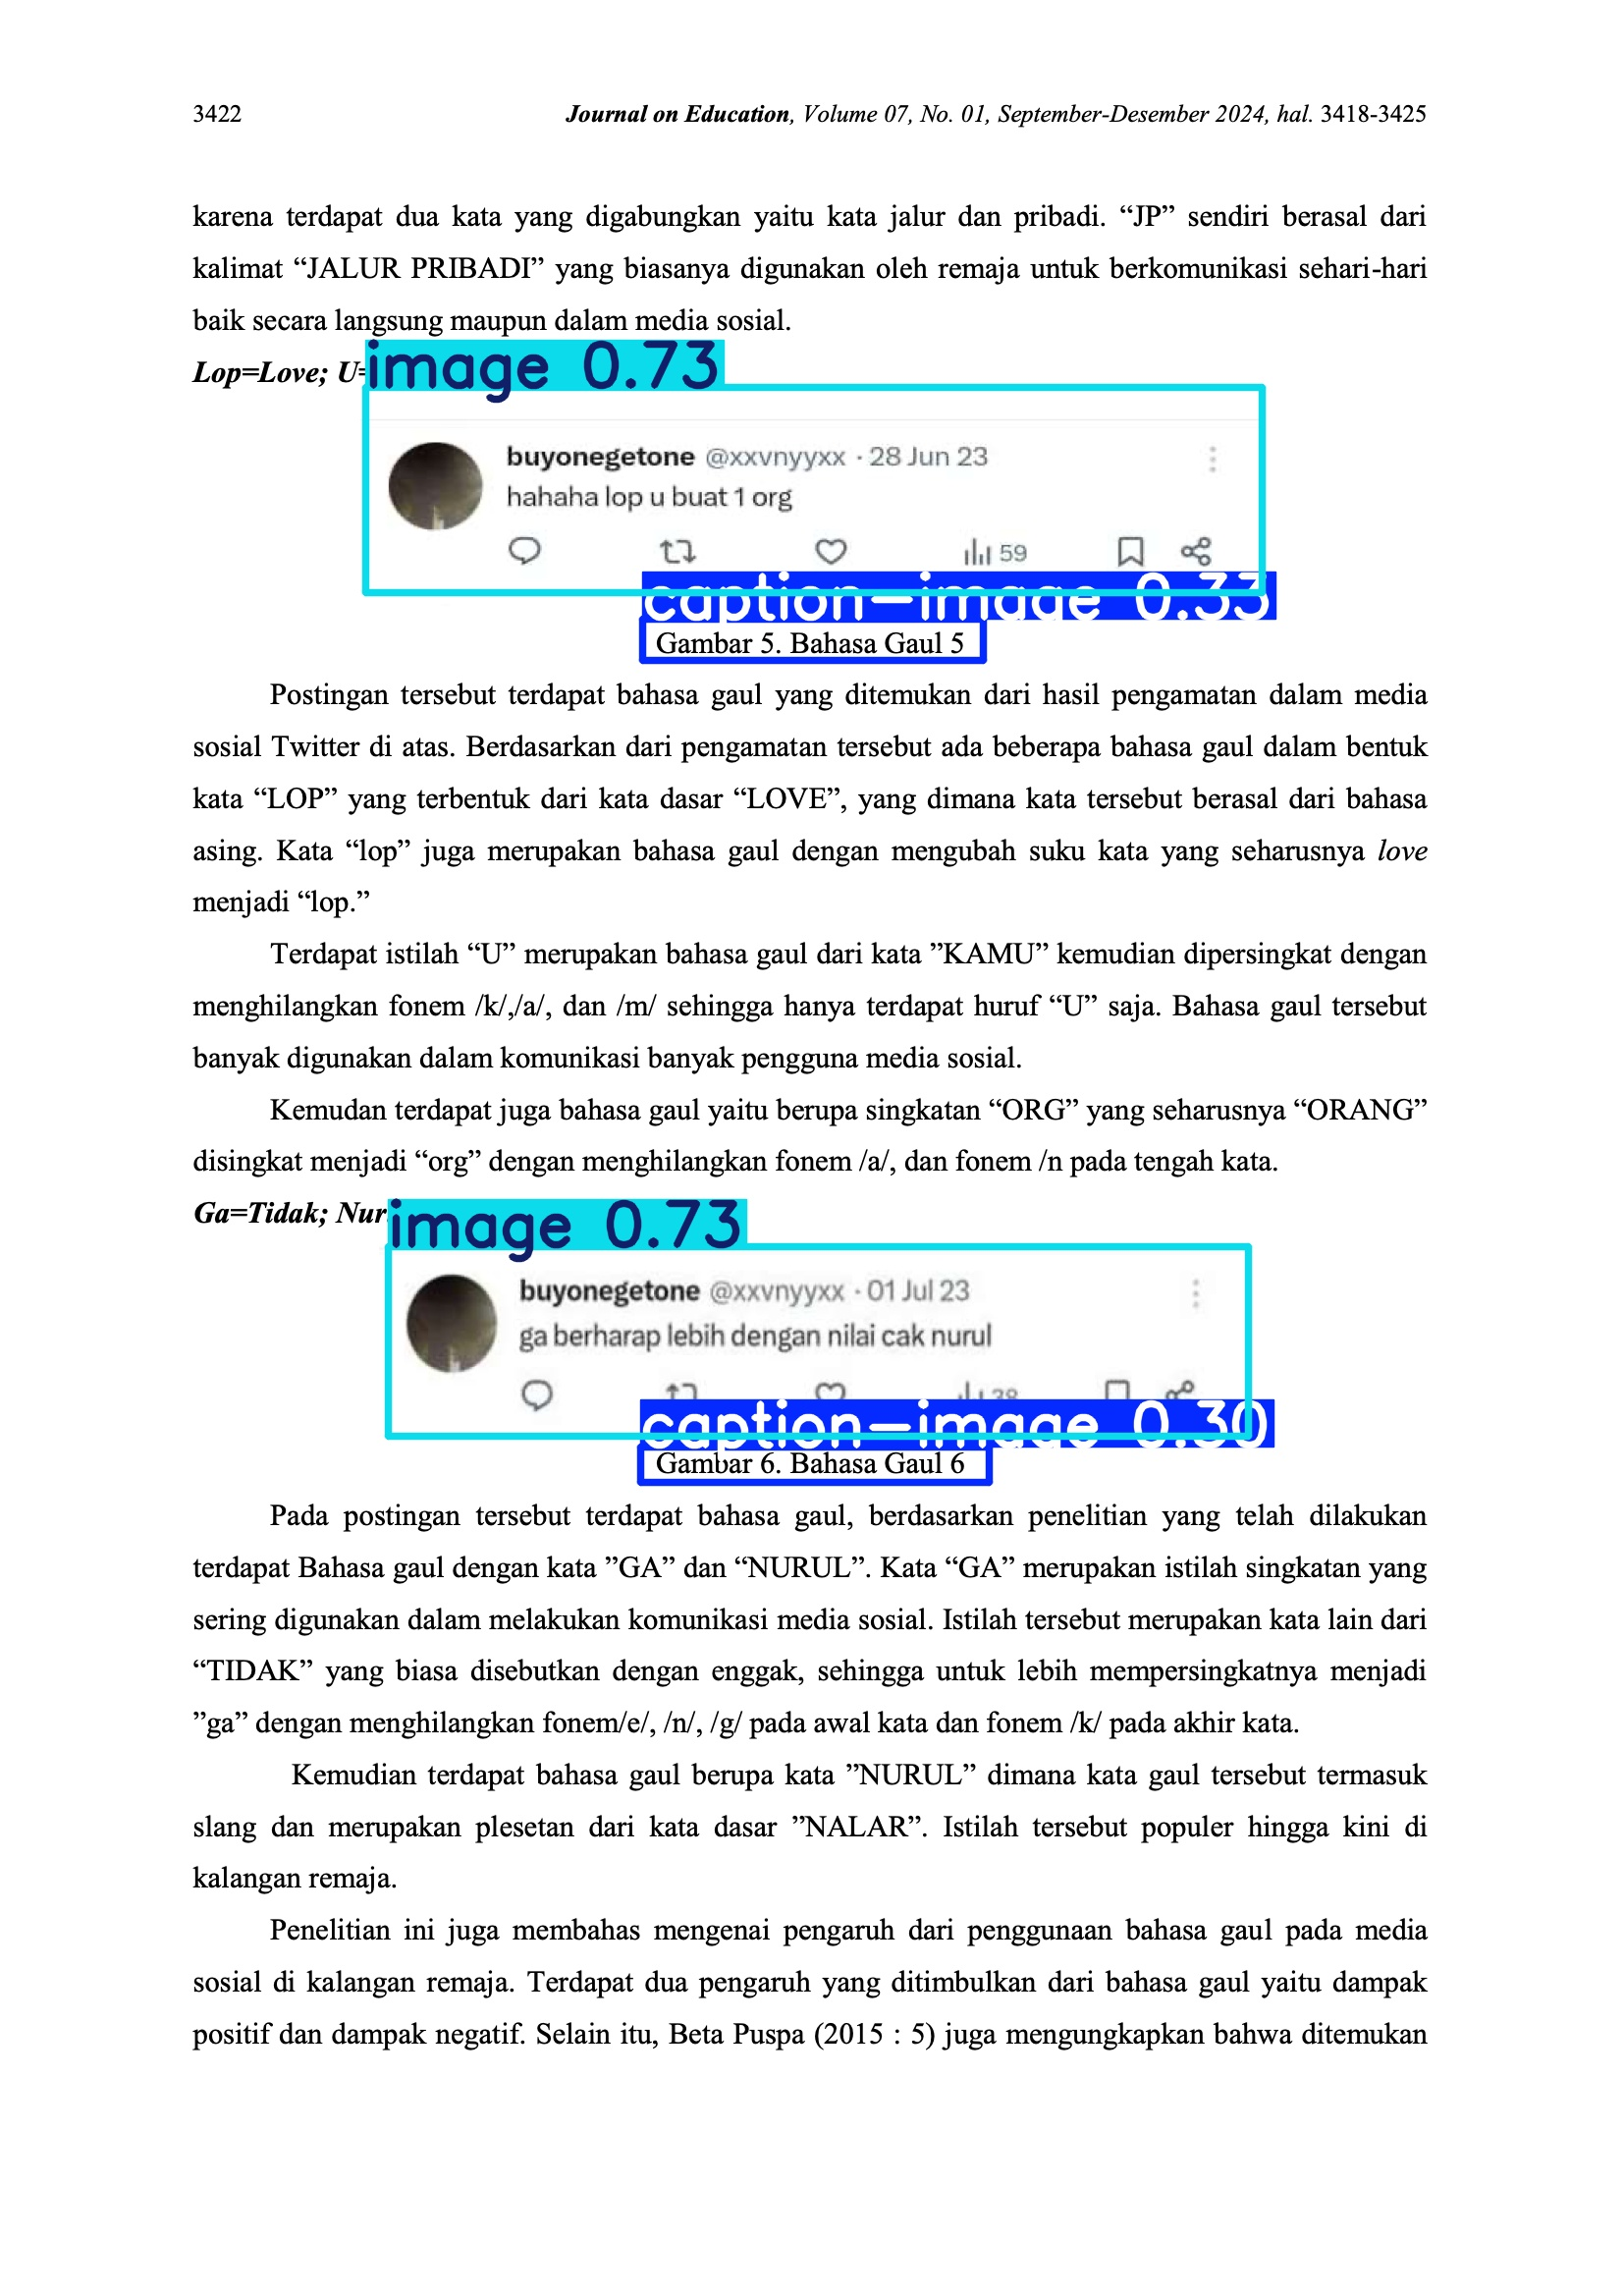

In [1]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'../runs/detect/predict2/*.jpg')[:10]:
  display(Image(filename=image_path, height=10))
  print('\n')

In [2]:
id2label = {0: "caption-image", 1:"image"}
detected = {0: list(), 1: list()}

In [3]:
import os
from PIL import Image

# Paths
label_dir = '../runs/detect/predict2/labels'
image_dir = '../runs/detect/predict2'

for label_path in glob.glob(os.path.join(label_dir, '*.txt')):
    image_name = os.path.splitext(os.path.basename(label_path))[0] + '.jpg'
    image_path = os.path.join(image_dir, image_name)

    img = Image.open(image_path)
    img_width, img_height = img.size

    with open(label_path, 'r') as f:
        lines = f.readlines()

    print(f"Image: {image_name}")
    for line in lines:
        print(line, end='')
        label, x_center, y_center, w, h, confidence = map(float, line.strip().split())

        x_min = int((x_center - w / 2) * img_width)
        y_min = int((y_center - h / 2) * img_height)
        x_max = int((x_center + w / 2) * img_width)
        y_max = int((y_center + h / 2) * img_height)

        obj = dict()
        obj['x_min'] = x_min
        obj['x_max'] = x_max
        obj['y_min'] = y_min
        obj['y_max'] = y_max
        obj['conf'] = confidence
        detected[label].append(obj)

        print(f"Class {int(label)}: (x_min={x_min}, y_min={y_min}), (x_max={x_max}, y_max={y_max})")
        print(f"Image width: {img_width}, image height: {img_height}")
        print()
    print("=====================================================================")


Image: 1b0f92f5-101.jpg
1 0.504114 0.584137 0.529553 0.0826025 0.734918
Class 1: (x_min=395, y_min=1269), (x_max=1271, y_max=1462)
Image width: 1654, image height: 2338

1 0.501107 0.213501 0.552127 0.0893462 0.725185
Class 1: (x_min=372, y_min=394), (x_max=1285, y_max=603)
Image width: 1654, image height: 2338

0 0.500586 0.278804 0.209435 0.0179985 0.330906
Class 0: (x_min=654, y_min=630), (x_max=1001, y_max=672)
Image width: 1654, image height: 2338

0 0.501935 0.637914 0.214525 0.015219 0.298258
Class 0: (x_min=652, y_min=1473), (x_max=1007, y_max=1509)
Image width: 1654, image height: 2338



In [4]:
detected

{0: [{'x_min': 654,
   'x_max': 1001,
   'y_min': 630,
   'y_max': 672,
   'conf': 0.330906},
  {'x_min': 652,
   'x_max': 1007,
   'y_min': 1473,
   'y_max': 1509,
   'conf': 0.298258}],
 1: [{'x_min': 395,
   'x_max': 1271,
   'y_min': 1269,
   'y_max': 1462,
   'conf': 0.734918},
  {'x_min': 372, 'x_max': 1285, 'y_min': 394, 'y_max': 603, 'conf': 0.725185}]}

In [5]:
import json
with open('test_101.json','r') as file:
    ocr_result = json.load(file)
max_idx = len(ocr_result['text'])
max_idx

401

In [6]:
def intersect_rect(image_obj, x_min2, x_max2, y_min2, y_max2):
    tolerance = 5
    x_min1, x_max1 = image_obj['x_min']+tolerance, image_obj['x_max']+tolerance
    y_min1, y_max1 = image_obj['y_min']+tolerance, image_obj['y_max']+tolerance

    return not ((x_max1 <= x_min2 or x_max2 <= x_min1) or
                (y_max1 <= y_min2 or y_max2 <= y_min1))

In [7]:
new_txt = ""

# tdk append text dalam image yg kedetect ocr
for i in range(max_idx):
    is_img = False
    text = ocr_result['text'][i]

    for obj in detected[1]:
        x_min2 = ocr_result['left'][i]
        x_max2 = ocr_result['left'][i]+ocr_result['width'][i]
        y_min2 = ocr_result['top'][i]
        y_max2 = ocr_result['top'][i]+ocr_result['height'][i]

        if(intersect_rect(obj, x_min2, x_max2, y_min2, y_max2)): 
            is_img = True
            break
    
    if not is_img and text != "": new_txt += text + " "


In [8]:
new_txt

'3422 Journal on Education, Volume 07, No. 01, September-Desember 2024, hal. 3418-3425 karena terdapat dua kata yang digabungkan yaitu kata jalur dan pribadi. “JP” sendiri berasal dari kalimat “JALUR PRIBADI” yang biasanya digunakan oleh remaja untuk berkomunikasi sehari-hari baik secara langsung maupun dalam media sosial. Lop=Love; U=kamu; Org=Orang Gambar 5. Bahasa Gaul 5 Postingan tersebut terdapat bahasa gaul yang ditemukan dari hasil pengamatan dalam media sosial Twitter di atas. Berdasarkan dari pengamatan tersebut ada beberapa bahasa gaul dalam bentuk kata “LOP” yang terbentuk dari kata dasar “LOVE”, yang dimana kata tersebut berasal dari bahasa asing. Kata “lop” juga merupakan bahasa gaul dengan mengubah suku kata yang seharusnya love menjadi “lop.” Terdapat istilah “U” merupakan bahasa gaul dari kata”>KAMU” kemudian dipersingkat dengan menghilangkan fonem /k/,/a/, dan /m/ sehingga hanya terdapat huruf “U” saja. Bahasa gaul tersebut banyak digunakan dalam komunikasi banyak peng

In [12]:
caption_img = [] #{caption: no urut caption, img: no urut img}: dict

for id, caption in enumerate(detected[0]):
    y_min_c, y_max_c = caption['y_min'], caption['y_max']
    min_val = 1e5
    min_idx = -1

    for idx, img in enumerate(detected[1]):
        y_min_img, y_max_img = img['y_min'], img['y_max']

        # caption di atas img
        diff_up = abs(y_min_img-y_max_c)
        # kalau caption di bawah img
        diff_down = abs(y_min_c - y_max_img)
        
        if(diff_up < diff_down): 
            if diff_up < min_val: 
                min_val = diff_up
                min_idx = idx
        else: 
            if diff_down < min_val: 
                min_val = diff_down
                min_idx = idx
    
    print(id, min_val, min_idx)
    caption_img.append({"caption":id, "img":min_idx})

0 27 1
1 11 0


In [13]:
caption_img

[{'caption': 0, 'img': 1}, {'caption': 1, 'img': 0}]

In [14]:
from figure import Figure

figure_list = []

# get kata2 captionnya
for obj in caption_img:
    # get position caption
    caption = detected[0][obj['caption']]
    img = detected[1][obj['img']]
    caption_txt = ""

    for i in range(max_idx):
        x_min2 = ocr_result['left'][i]
        x_max2 = ocr_result['left'][i]+ocr_result['width'][i]
        y_min2 = ocr_result['top'][i]
        y_max2 = ocr_result['top'][i]+ocr_result['height'][i]

        if(intersect_rect(caption, x_min2, x_max2, y_min2, y_max2)): 
            text = ocr_result['text'][i]
            if text != "": caption_txt += text + " "

    figure_list.append(Figure(caption, img, caption_txt, img_file_name))

In [15]:
for fig in figure_list:
    print(fig)

FILE NAME: dataset/1b0f92f5-101.png
================IMAGE===================
x: 372-1285
y: 394-603
================CAPTION===================
x: 654-1001
y: 630-672
text: Gambar 5. Bahasa Gaul 5 

FILE NAME: dataset/1b0f92f5-101.png
================IMAGE===================
x: 395-1271
y: 1269-1462
================CAPTION===================
x: 652-1007
y: 1473-1509
text: Gambar 6. Bahasa Gaul 6 

